図11.6のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

/Users/kaz/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/scipy/signal/filter_design.py:1549: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


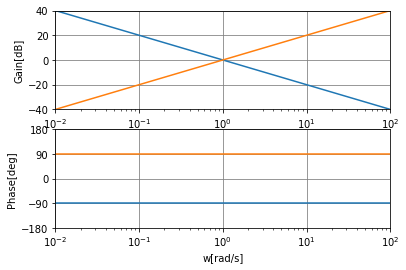

In [2]:
#積分・微分要素のパラメータを与える
K =1 #K=1
T = 1 #T=1

#伝達関数の分子・分母多項式を与える
num1 = [0, K] #積分要素の分子多項式
den1 = [1, 0] #積分要素の分母多項式
num2 = [K, 0] #微分要素の分子多項式
den2 = [0, 1] #微分要素の分子多項式

#伝達関数表現を与える
sys1 = signal.lti(num1, den1)  #積分要素の伝達関数表現（signal.ltiの場合）
sys2 = signal.lti(num2, den2)  #微分要素の伝達関数表現（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

#周波数応答の計算．wは角周波数，gainはゲイン,phaseは位相を表す．
[w1, gain1, phase1] = signal.bode(sys1, w) #ゲインと位相
[w2, gain2, phase2] = signal.bode(sys2, w) #ゲインと位相

# ゲイン線図のプロット
plt.subplot(2, 1, 1) #2つの図を縦に並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(w1, gain1, w2, gain2) #ゲイン線図をプロット
plt.xlim([0.01,100]) #横軸（角周波数）の範囲の指定
plt.ylim([-40,40]) #縦軸（デシベル値）の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #2つの図を縦に並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(w1, phase1, w2, phase2) #位相線図をプロット
plt.xlim([0.01,100]) #横軸の範囲の指定
plt.ylim([-180,180]) #縦軸（度）の範囲の指定
plt.yticks([-180,-90,0,90,180]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Phase[deg]") #縦軸のラベル表示
plt.show() #グラフの表示